# Анализ данных для интернет-магазина компьютерных игр «Стримчик»

__Данные__: /datasets/games.csv

__Описание данных__: 
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

__Цель:__ выявить определяющие успешность игры закономерности


__План работ:__
1. Открыть файл с данными и изучить общую информацию:
    - Путь к файлу: /datasets/games.csv.
2. Подготовить данные:
    - заменить названия столбцов (привести к нижнему регистру);
    - преобразовать данные в нужные типы;
    - обработать пропуски при необходимости;
    - выявить причины, которые могли привести к пропускам;
    - обработать значение tbd
    - посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
3. Провести исследовательский анализ данных:
    - посмотреть сколько игр выпускалось в разные годы.    
    - посмотреть, как менялись продажи по платформам. выбрать платформы с наибольшими суммарными продажами и построить распределение по годам.
    - выявить какие платформы лидируют по продажам, растут или падают. Выбирать несколько потенциально прибыльных платформ.
    - построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
    - посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.
    - соотнести выводы с продажами игр на других платформах.
    - посмотреть на общее распределение игр по жанрам. 
4. Составить портрет пользователя каждого региона
    - определить для пользователя каждого региона (NA, EU, JP):
        - самые популярные платформы (топ-5).
        - самые популярные жанры (топ-5).
        - влияет ли рейтинг ESRB на продажи в отдельном регионе.
5. Проверить гипотезы
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
6. Написать общий вывод

#### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
df.shape

(16715, 11)

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##### Выводы

Данные загружены, преобразованы в датафрейм без ошибок.

В данных:
- имеются пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_score`, `Rating` 
- у столбцов `Year_of_Release`, `User_Score` тип данных не соответствует значениям
- названия столбцов с заглавных букв

Возможно, пропуски в столбцах с рейтингом связаны с годом выпуска игры.

#### Подготовка данных 

Начнем с изменения названия столбцов

In [5]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Теперь изучим пропуски

In [6]:
(df.isna().sum() / len(df)).round(4) * 100

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

In [7]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df[df.year_of_release.isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [9]:
df[df.year_of_release.isna()].shape

(269, 11)

In [10]:
df[df.genre.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
df[df.critic_score.isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [12]:
df[df.user_score.isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [13]:
df[df.rating.isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


В столбцах `name` и `genre` всего две идентичные записи с пропусками. В этих же записях присутствуют пропуски в столбцах рейтингов. Т.к. записей всего 2 и год выпуска игр - 1993, а восстановить название и жанр при помощи других записей невозможно - их можно убрать.

В столбце `year_of_release` 269 пропусков. Их можно попробовать восстановить при помощи данных из названия самой игры или открытых источников. 
С другой стороны, записей всего 1% от общего числа и возможно они не имеют значимости для исследования из-за неактуальной на момент 2016 года игровой платформы. 

В столбцах с рейтингами есть одновременные пропуски, но так же имеются и пропуски отдельно в каждом столбце. Явной зависимости от каких-то других столбцов не просматривается. Вероятнее всего, пропуски здесь появились в следствие нескольких причин, например не все игры попадают на оценку критикам, не очень популярные проекты проходят незамеченными - особенно в те времена, когда игры не распространялись через онлайн-сервисы. 

Заполнять медианным, средним значением или модой - не самый лучший выбор, т.к. заполнение может сильно повлиять на репрезентативность данных. 

Так же в рейтинге встречается значение tbd, аббревиатура от 'to be decided' или 'to be determined', т.е на момент внесения данных рейтинг был неизвестен. 

Заменим отсутствующие значения на маркер -1. 

Рейтинг ESRB возможно заполнить только внешними данными, т.к. он не привязан ни к одному из столбцов датафрейма. Здесь данные отсутствуют скорее всего по двум основным причинам. Первая - ESRB появилась только в 1994 году и не сразу набрала популярность и не носит обязательных характер. Вторая - это организация появилась в США и Канаде, а у нас данные по продажам в том числе и по Японии. Отсутствующие значения в рейтинге заменим на unknown 

In [14]:
df = df.dropna(subset=['name'])
df.name.isna().sum()

0

In [15]:
df[df.year_of_release.isna()].platform.value_counts()

PS2     34
Wii     34
X360    30
DS      30
PS3     25
XB      21
PC      17
2600    17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
PSV      1
GB       1
Name: platform, dtype: int64

На 2016 год, всё ещё актуальной является PC, PSV, 3DS. Все остальные платформы уже не поддерживаются. Итого, значимых для исследования записей - 25, что сильно меньше даже процента. Так же заполним пропуски маркером. 

In [16]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df.fillna({'year_of_release': -1, 'critic_score': -1 , 'user_score': -1, 'rating': 'unknown'}, inplace=True)

In [17]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Теперь преобразуем типы данных

In [18]:
df = df.astype({'year_of_release' : 'int32','user_score' : 'float64'})
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


Рассмотрим датафрейм на наличие дубликатов по имени и платформе.

In [19]:
df.duplicated().sum()

0

In [20]:
df[df.duplicated(subset=['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,-1,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [21]:
df[df.name == 'Need for Speed: Most Wanted'].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E
6473,Need for Speed: Most Wanted,GBA,2005,Racing,0.19,0.07,0.00,0.00,-1.0,8.3,E
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,-1.0,-1.0,unknown
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,-1.0,-1.0,unknown


In [22]:
df[df.name == 'Sonic the Hedgehog']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,-1.0,-1.0,unknown
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,-1,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


In [23]:
df[df.name == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,-1.0,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Похоже, в случае с 'Need for Speed: Most Wanted' мы имеем дело не с дубликатом, а с игрой с одинаковыми названиями и платформами, но вышедших в 2005 и 2012 году соответственно. Их оставим без изменений.

В случае 'Sonic the Hedgehog' вероятно случилась ошибка во внесении данных из-за разницы в старте продаж игры на PS3. 
>The Xbox 360 version of Sonic the Hedgehog was released in North America on November 14, 2006, followed by a European release on November 24. Both versions were released in Japan on December 21. The PlayStation 3 version was released in North America on January 30, 2007, and in Europe on March 23.

Вполне возможно, что отсутствующее значение в столбце года выпуска возникло по этой же причине - в одном регионе игра была выпущена в 2006, а в другом - в 2007. Видно, что число продаж для EU в записях различается. Прибавим число продаж из EU в более полную запись и удалим дубликат.

В случае Madden NFL 13 можно говорить о дублировании записей, но также, как и в случае с 'Sonic the Hedgehog', неполном. Здесь поступим аналогично.

In [24]:
df.loc[1745, 'eu_sales'] +=  df.loc[4127, 'eu_sales']
df.loc[604, 'eu_sales'] +=  df.loc[16230, 'eu_sales']
df = df.drop(index=[4127, 16230])
df[df.duplicated(subset=['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T


In [25]:
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales

##### Выводы

- названия столбцов приведены к нижнему регистру;
- обработаны пропуски и значение 'tbd' в столбцах: год выпуска, оценка критиков, оценка пользователей, рейтинг ESRB;
- в рейтинге ESRB пропуски заменены на unknown, в остальных на -1; 
- столбцы с годом выпуска и с оценкой пользователей приведены к необходимым типам данным
- посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец `total_sales`

#### Исследовательский анализ данных

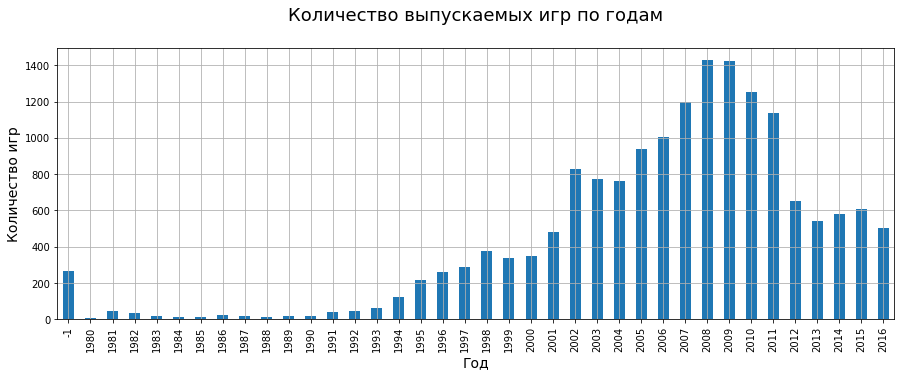

In [26]:
(
    df.year_of_release.value_counts().sort_index().plot(kind='bar', figsize=(15,5), grid=True)
    .set_title('Количество выпускаемых игр по годам\n', fontsize = 18)
)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество игр', fontsize=14);

Начиная с 1993 по 2009 год видим постоянный рост количества выпускаемых игр. В 2009 количество выпускаемых игр для имеющихся на рынке платформ начало снижаться. Вероятно, в это время начал активно развиваться рынок смартфонов и часть продаж ушла туда. 

Данных до 1993 года незначительное количество и их можно не учитывать в дальнейших исследованиях.

In [27]:
platform_group = df.groupby('platform').sum().total_sales.sort_values(ascending=False)
platform_group

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Топ 7 платформ по количеству продаж: 

1. PS2
2. X360
3. Wii
4. PS3
5. DS
6. PS
7. GBA

Далее идут платформы с продажами в 1% от общего количества и менее. 

Посмотрим на графики продаж по годам.
Пока что оставим маркер -1, чтобы визуально оценить какое количество записей не было учтено для каждой платформы.

In [28]:
def platform_bar_plot(platform_name:str):
    (df[df.platform == platform_name].groupby('year_of_release').count().total_sales.plot(kind='bar', figsize=(15,5), grid=True)
 .set_title(f'Количество продаж игр на {platform_name} по годам\n', fontsize = 18)
)
    plt.xlabel('Год', fontsize=14)
    plt.ylabel('Количество игр', fontsize=14)
    plt.show();

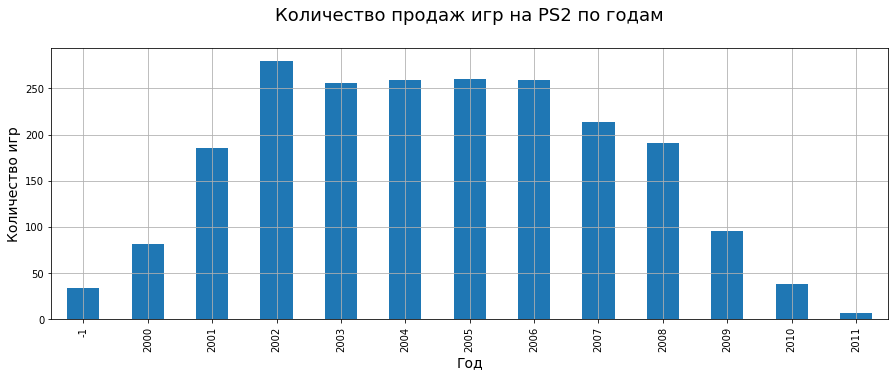

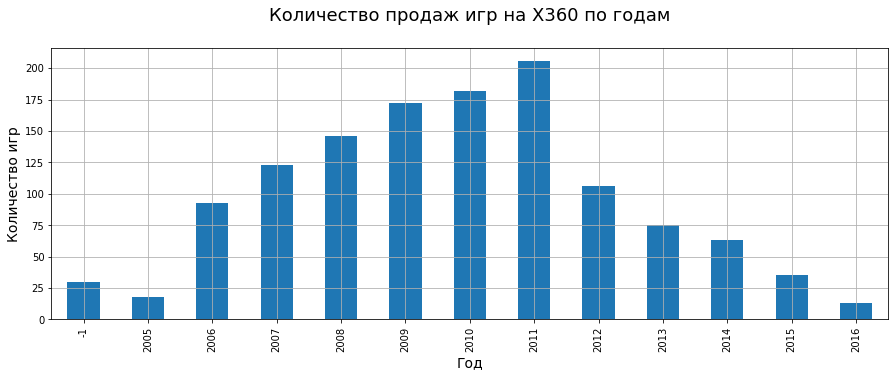

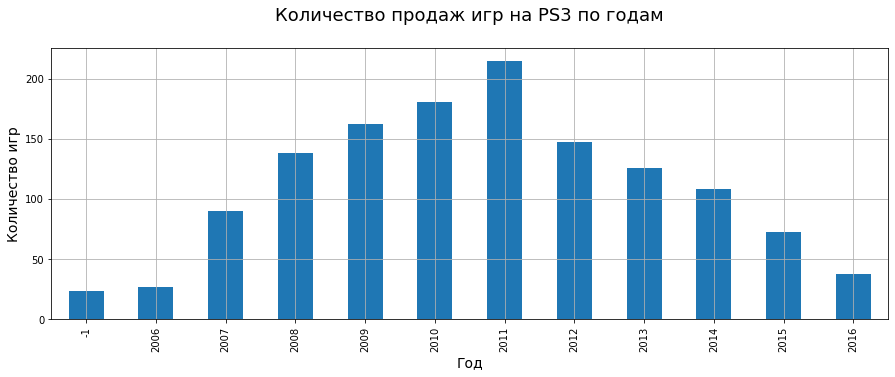

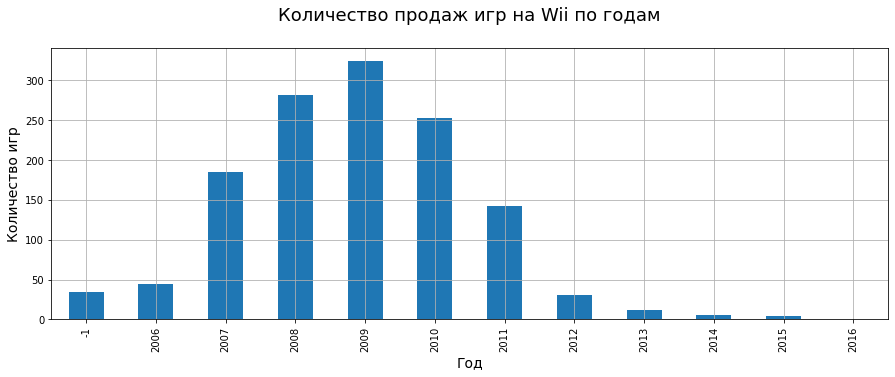

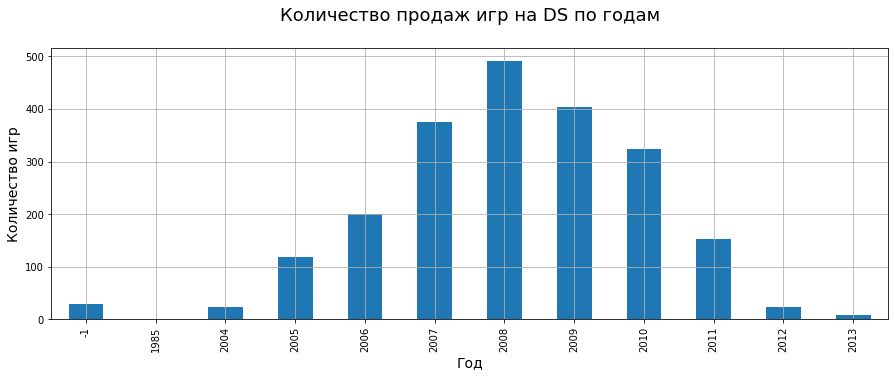

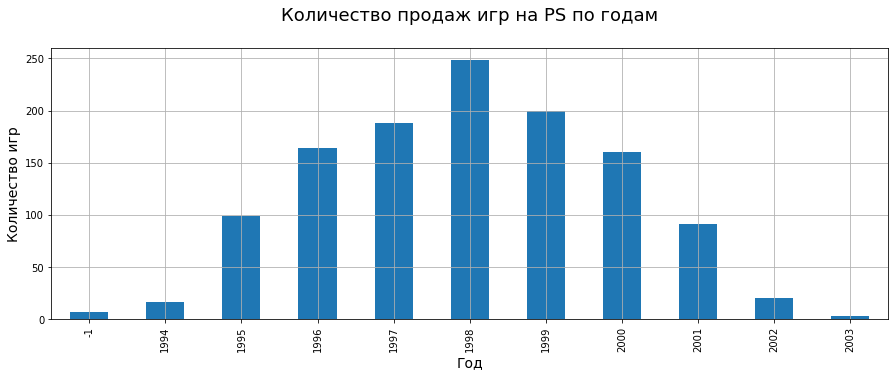

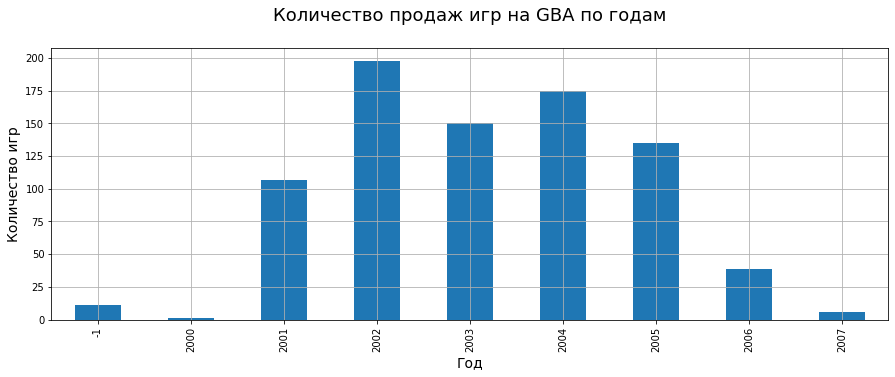

In [29]:
for platform in platform_group.index[:7]:
    platform_bar_plot(platform)

In [30]:
df[(df.platform=='DS') & (df.year_of_release == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,unknown,0.02


У платформы DS обнаруживается игра с аномальным годом выпуска - 1985. Аномальный, т.к. сама платформа начала выпускаться с 2004. Как говорит интернет - это перевыпуск игры 1985 года для DS. Перевыпуск был в 2007 году, заменим это значение.

In [31]:
df.loc[15957, 'year_of_release'] = 2007

Посмотрим теперь на общую картину.

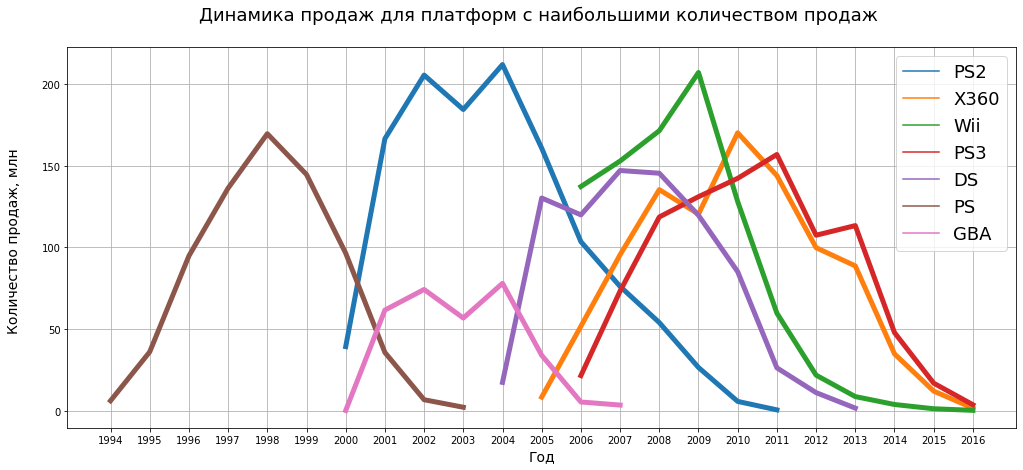

In [32]:
sales_by_year = df[df.year_of_release != -1].pivot_table(index='year_of_release', 
                                                         columns='platform', 
                                                         values='total_sales', 
                                                         aggfunc='sum')

most_sales_by_year = sales_by_year.loc[:, ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA']]

plt.figure(figsize=(17, 7))
sns.lineplot(data=most_sales_by_year, linewidth=5, dashes=False)
plt.title('Динамика продаж для платформ с наибольшими количеством продаж \n', fontsize=18)
plt.legend(loc='upper right', fontsize=18)
plt.xticks(range(1994, 2017, 1))
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество продаж, млн \n', fontsize=14)
plt.grid(visible=True)
plt.show()

Судя по графикам продаж игр по годам для платформ с самым большим числом продаж - платформа живет от 7 до 11 лет. 
Посчитаем среднее по всем платформам

In [33]:
platforms_lifespan = []

for platform in sales_by_year.columns:
    platform_years = (sales_by_year.index[~sales_by_year[platform].isnull()])
    lifespan = platform_years.max() - platform_years.min() + 1
    platforms_lifespan.append(lifespan)

print(f'Средняя продолжительность жизни платформы - {np.mean(platforms_lifespan)} лет')

Средняя продолжительность жизни платформы - 8.0 лет


Средняя продолжительность жизни платформы - 8 лет. Однако, нам необходимо составить прогноз на 2017 год, следовательно полный цикл жизни в данном случае не сильно интересен, интересно только его начало, т.е. интересно знать - что точно будет выгодно в следующем году, где продажи будут расти. 

По графикам видно, что рост продаж приходится на первые 3-4 года (в зависимости от того, в какое десятилетие начала выпускаться платформа). Можно наблюдать тенденцию к сокращению срока роста продаж с течением времени. 

В таком случае, возьмём актуальный для нашего исследования период с 2014 года. 

In [34]:
actual_df = df[df.year_of_release >= 2014]

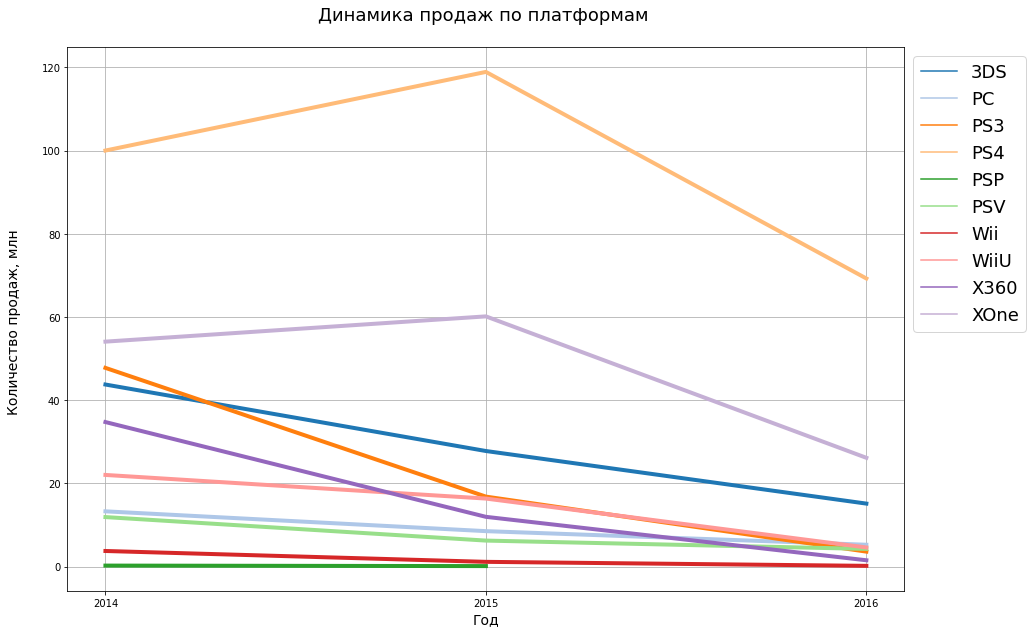

In [35]:
actual_sales = actual_df[actual_df.year_of_release != -1].pivot_table(index='year_of_release', 
                                                         columns='platform', 
                                                         values='total_sales', 
                                                         aggfunc='sum')

plt.figure(figsize=(15, 10))
sns.lineplot(data=actual_sales, linewidth=4, dashes=False, palette='tab20')
plt.title('Динамика продаж по платформам \n', fontsize=18)
plt.legend(loc='upper left', fontsize=18, bbox_to_anchor=(1, 1))
plt.xticks(range(2014, 2017, 1))
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество продаж, млн \n', fontsize=14)
plt.grid(visible=True)
plt.show()

На графике отчетливо видим потенциально прибыльные платформы - ХOne и PS4.  
Снижение продаж в 2016 году можно объяснить отсутствием полных данных за этот период.

Также условно прибыльной (в течение года-двух) еще можно назвать платформу 3DS, хотя на графике отчетливо видим тенденцию к снижению числа продаж. 

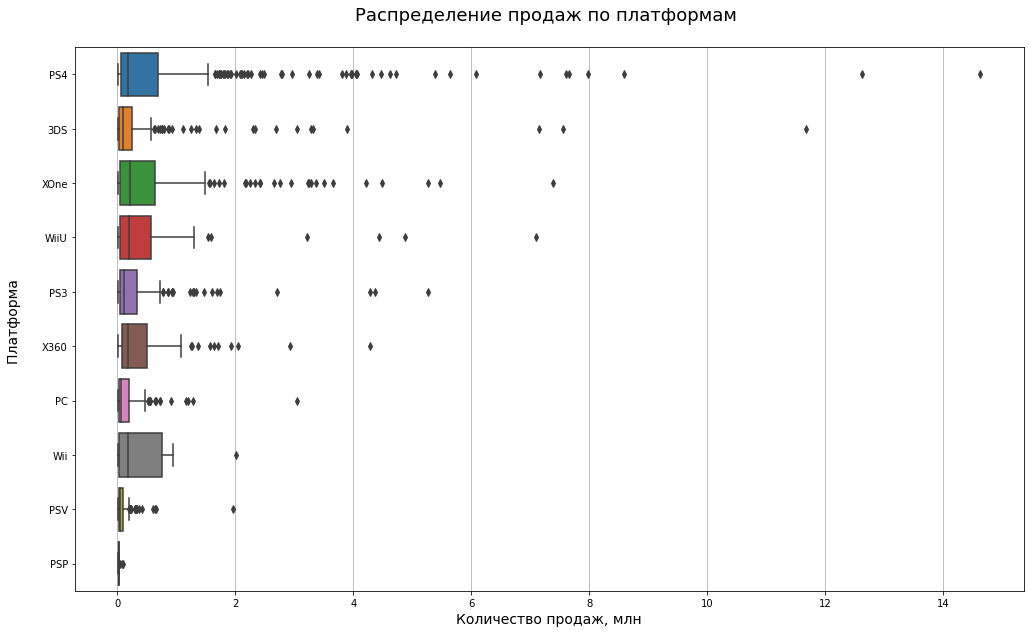

In [36]:
plt.figure(figsize=(17, 10))
plt.grid(visible=True, axis='y')
sns.boxplot(data=actual_df, y='platform', x='total_sales')
plt.grid(visible=True, axis='x')
plt.title('Распределение продаж по платформам \n', fontsize=18)
plt.xlabel('Количество продаж, млн', fontsize=14)
plt.ylabel('Платформа \n', fontsize=14);

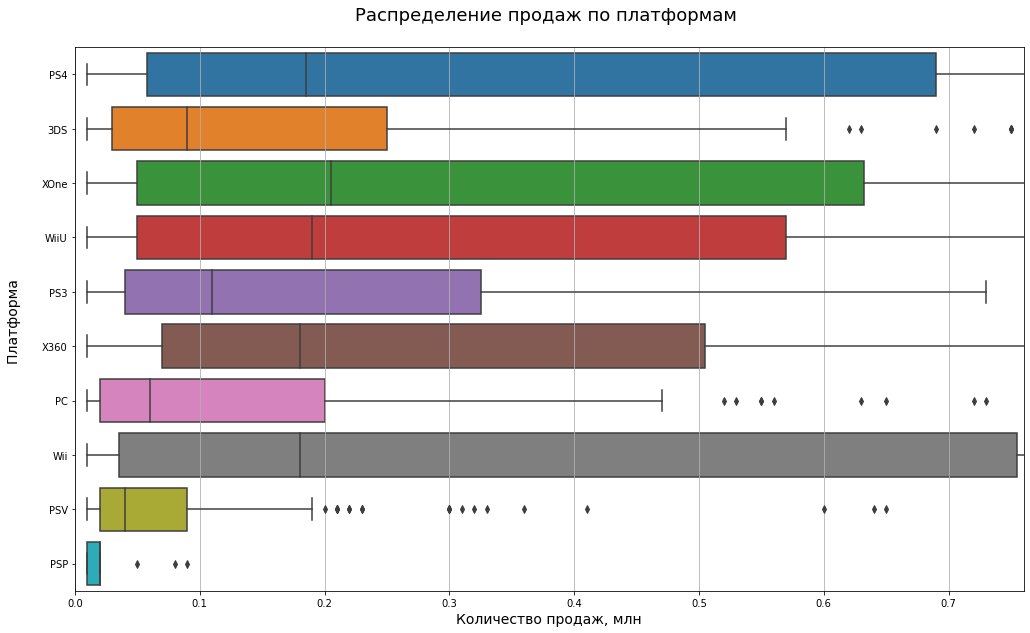

In [37]:
plt.figure(figsize=(17, 10))
plt.grid(visible=True, axis='y')
sns.boxplot(data=actual_df, y='platform', x='total_sales')
plt.xlim([0, 0.76])
plt.grid(visible=True, axis='x')
plt.title('Распределение продаж по платформам \n', fontsize=18)
plt.xlabel('Количество продаж, млн', fontsize=14)
plt.ylabel('Платформа \n', fontsize=14);

На диаграмме размаха отчетливо видны предыдущие лидеры продаж(Х360 и PS3, Wii) и набирающие популярность платформы Xone и PS4e.
Встречается очень много выбросов, что неудивительно, ведь есть игры популярные и не очень. Соответственно у популярных игр продаж будет очень много и наоборот.


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [38]:
x_one_user = actual_df[(actual_df.platform == 'XOne') & (actual_df.user_score >= 0)]
x_one_critic = actual_df[(actual_df.platform == 'XOne') & (actual_df.critic_score >= 0)]

In [39]:
corr = x_one_user.corr()
corr['user_score']

year_of_release   -0.033366
na_sales          -0.068053
eu_sales          -0.061547
jp_sales           0.062259
other_sales       -0.069776
critic_score       0.250183
user_score         1.000000
total_sales       -0.070384
Name: user_score, dtype: float64

In [40]:
st.spearmanr(x_one_user.user_score, x_one_user.total_sales)

SpearmanrResult(correlation=-0.07614016867771539, pvalue=0.33104323742962727)

In [41]:
corr = x_one_critic.corr()
corr['critic_score']

year_of_release   -0.012092
na_sales           0.401137
eu_sales           0.385121
jp_sales           0.207366
other_sales        0.425689
critic_score       1.000000
user_score         0.429468
total_sales        0.428677
Name: critic_score, dtype: float64

In [42]:
st.spearmanr(x_one_critic.critic_score, x_one_critic.total_sales)

SpearmanrResult(correlation=0.5450763498170512, pvalue=2.2542310713878327e-13)

Видим, что и расчет коэффициента Пирсона, и коэффициента Спирмена на дали сколько-нибудь значимых результатов (p-value по методу Спирмена больше 0.05).
Коэффициент Спирмена применялся, т.к. оценки критиков и пользователей являются дискретными велчинами и расчет коэффициента корреляции Пирсона может дать некорректные результаты.

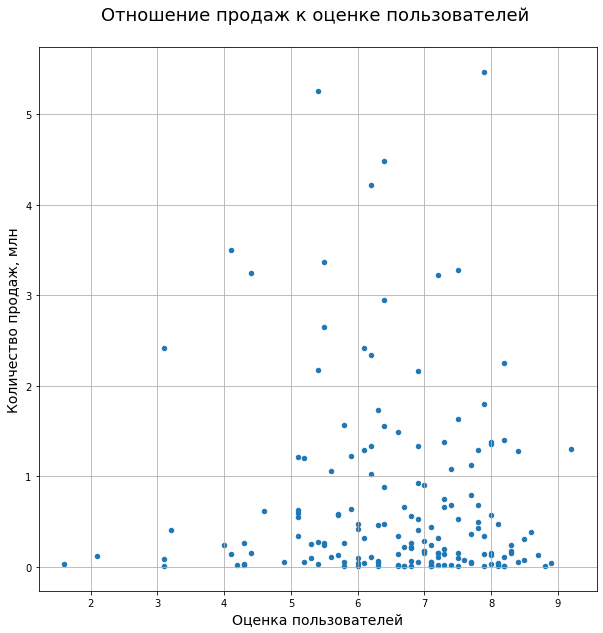

In [43]:
(
    x_one_user.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,10), grid=True)
        .set_title('Отношение продаж к оценке пользователей \n', fontsize = 18)
)
plt.xlabel('Оценка пользователей', fontsize=14)
plt.ylabel('Количество продаж, млн', fontsize=14);

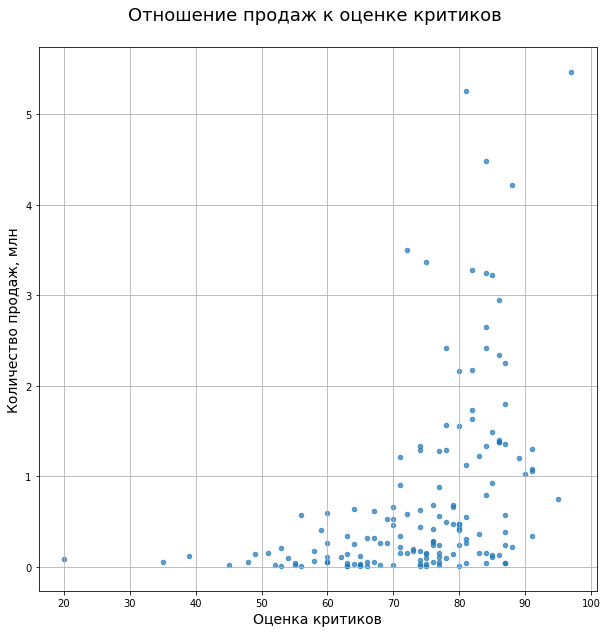

In [44]:
(
    x_one_critic.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.7, figsize=(10,10), grid=True)
        .set_title('Отношение продаж к оценке критиков \n', fontsize = 18)
)
plt.xlabel('Оценка критиков', fontsize=14)
plt.ylabel('Количество продаж, млн', fontsize=14);

Как видим, оценки пользователей и критиков слабо связаны с продажами. Связь оценки критиков с продажами немного сильнее, однако нельзя точно сказать - это продажи увеличиваются из-за оценки критиков, или оценка критиков растёт из-за количества продаж? Так же нет возможности говорить о значимости этой корреляции.

Посмотрим так ли это для всех остальных платформ.

In [45]:
corr_df = pd.DataFrame(columns=['platform', 'users_score_sales_corr', 'critic_score_sales_corr'])

for platform in actual_df.platform.unique():
    
    users_rating = actual_df[(actual_df.platform == platform) & (actual_df.user_score >= 0)]
    critic_rating = actual_df[(actual_df.platform == platform) & (actual_df.critic_score >= 0)]

    corr_df.loc[len(corr_df.index )] = [platform, 
                                        users_rating['user_score'].corr(users_rating['total_sales']),
                                        critic_rating['user_score'].corr(critic_rating['total_sales'])]

corr_df

,platform,users_score_sales_corr,critic_score_sales_corr
0,PS4,-0.040132,-0.005041
1,3DS,0.215193,0.274369
2,XOne,-0.070384,0.007396
3,WiiU,0.407926,0.346501
4,PS3,-0.166761,0.156595
5,X360,-0.138445,0.336514
6,PC,-0.071597,-0.067356
7,Wii,1.000000,NaN
8,PSV,-0.168455,0.048583
9,PSP,NaN,NaN


Как видим, для остальных платформ ситуация в среднем аналогичная.

Посмотрим на распределение игр по жанрам.

In [46]:
actual_df.groupby('genre').count().name.sort_values(ascending=False)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

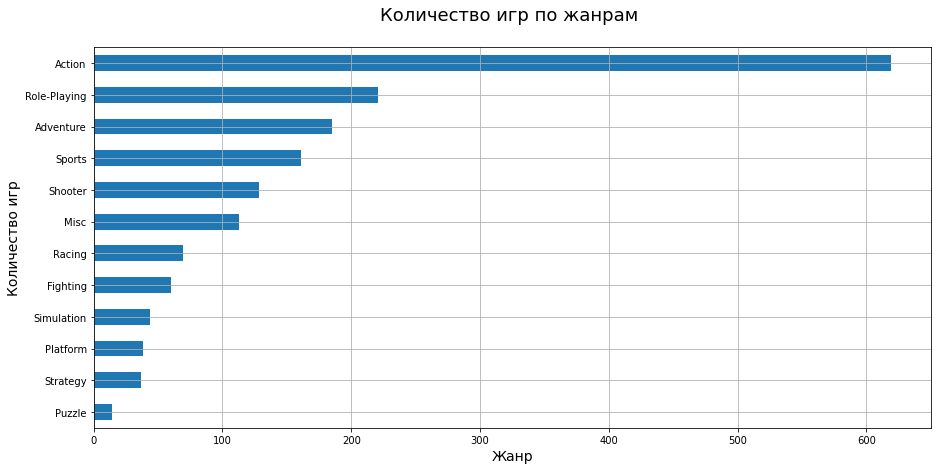

In [47]:
(
    actual_df.groupby('genre').count().name.sort_values()
    .plot(kind='barh', figsize=(15, 7), grid=True)
    .set_title(f'Количество игр по жанрам \n', fontsize = 18)
)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Количество игр', fontsize=14);

In [48]:
actual_df.groupby('genre').sum().total_sales.sort_values(ascending=False)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

Text(0, 0.5, 'Количество продаж')

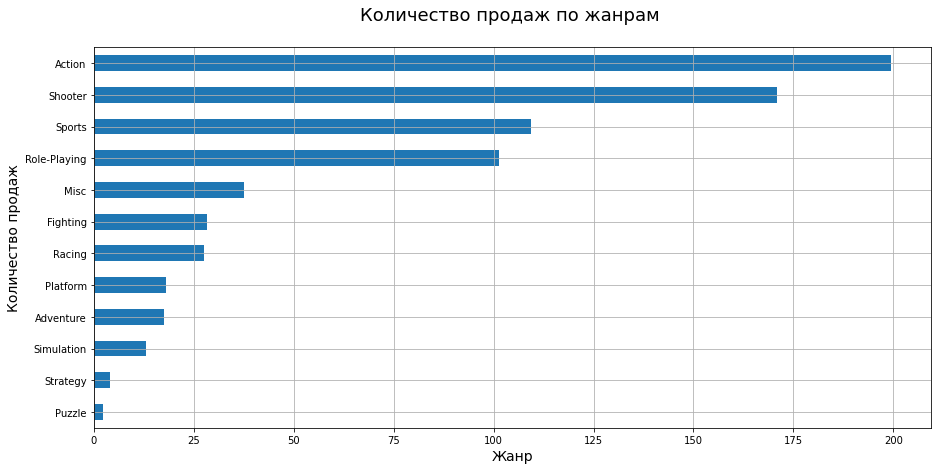

In [49]:
(
    actual_df.groupby('genre').sum().total_sales.sort_values()
    .plot(kind='barh', figsize=(15, 7), grid=True)
    .set_title(f'Количество продаж по жанрам \n', fontsize = 18)
)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Количество продаж', fontsize=14)

In [50]:
table = actual_df.pivot_table(index='genre',  values='total_sales', aggfunc=['count', 'sum'])
table.columns = ['count', 'total_sales']
table.reset_index(inplace=True)
table['sales_number_ratio'] = (table['total_sales'] / table['count']).round(2)
table.sort_values(by='sales_number_ratio', ascending=False)

,genre,count,total_sales,sales_number_ratio
8,Shooter,128,170.94,1.34
10,Sports,161,109.48,0.68
4,Platform,38,18.09,0.48
2,Fighting,60,28.22,0.47
7,Role-Playing,221,101.44,0.46
6,Racing,69,27.52,0.40
3,Misc,113,37.55,0.33
0,Action,619,199.36,0.32
9,Simulation,44,13.13,0.30
5,Puzzle,14,2.21,0.16


Как видно из графиков и таблиц, больше всего игр выпускается в жанре Action и за счет этого в этом же жанре больше всего продаж. 

Однако по соотношению продаж к общему числу игр, можно сделать вывод что прибыльнее всего жанры Shooter, Sports. 

Хуже всего продаются игры в жанре Adventure и Strategy. 

##### Выводы

- начиная с 1993 по 2009 год видим постоянный рост количества выпускаемых игр. В 2009 количество выпускаемых игр для имеющихся на рынке платформ начало снижаться. Вероятно, в это время начал активно развиваться рынок смартфонов и часть продаж ушла туда. 
- данных до 1993 год незначительное количество и их можно не учитывать в дальнейших исследованиях.
- средняя продолжительность жизни платформы - 8 лет
- потенциально прибыльные платформы на актуальный период - Хbox One и PS4
- на диаграмме размаха встречается очень много выбросов - некоторые игры имеют большее число продаж, чем все остальные 
- оценки пользователей и критиков слабо связаны с количеством продаж
- жанр Action имеет больше всего продаж, но и число выпускаемых игр в этом жанре больше 
- лучше всего продаются игры жанров Shooter и Sports
- хуже всего продаются игры жанра Adventure и Strategy

####   Портрет пользователя каждого региона

Составим портрет для пользователя каждого региона. Выделим:  
 - самые популярные платформы (топ-5)
 - самые популярные жанры (топ-5)
 - рейтинг ESRB

In [51]:
# функция для создания pivot_table с заранее заданными параметрами
def top(prop:str, market:str, num: int):
    table = ( 
        actual_df.pivot_table(index=prop, values=market, aggfunc='sum')
        .sort_values(by=market, ascending=False)
        .head(num)
)
    table.columns = [market]
    table.reset_index(inplace=True)
    table['share'] = (table[market] / actual_df[market].sum()).round(2)
    return table

In [52]:
# функция для построения графика общего вида
def top_bar(df:pd.DataFrame, prop:str, market:str, prop_plot_name:str, market_plot_name:str, x_label_name:str):
    df.plot(kind='bar', figsize=(15,5), grid=True, x=prop, y=market, legend=False)
    plt.title(f'Топ 5 {prop_plot_name} в {market_plot_name}\n', fontsize = 18)
    plt.xlabel(x_label_name, fontsize=14)
    plt.xticks(rotation=0)
    plt.ylabel('Количество продаж \n', fontsize=14)
    plt.show();

In [53]:
top_na_platforms = top('platform', 'na_sales', 5)
top_na_platforms

,platform,na_sales,share
0,PS4,98.61,0.35
1,XOne,81.27,0.29
2,X360,28.30,0.10
3,3DS,22.64,0.08
4,PS3,22.05,0.08


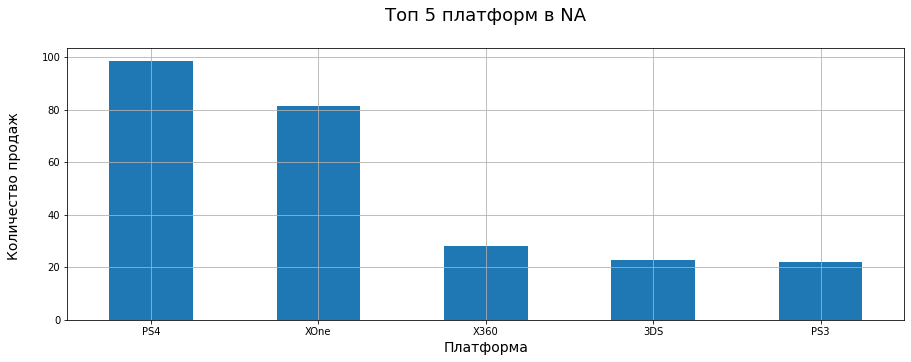

In [54]:
top_bar(top_na_platforms, 'platform', 'na_sales', 'платформ', 'NA', 'Платформа')

In [55]:
top_na_genres = top('genre', 'na_sales', 5)
top_na_genres

,genre,na_sales,share
0,Shooter,79.02,0.28
1,Action,72.53,0.26
2,Sports,46.13,0.16
3,Role-Playing,33.47,0.12
4,Misc,15.05,0.05


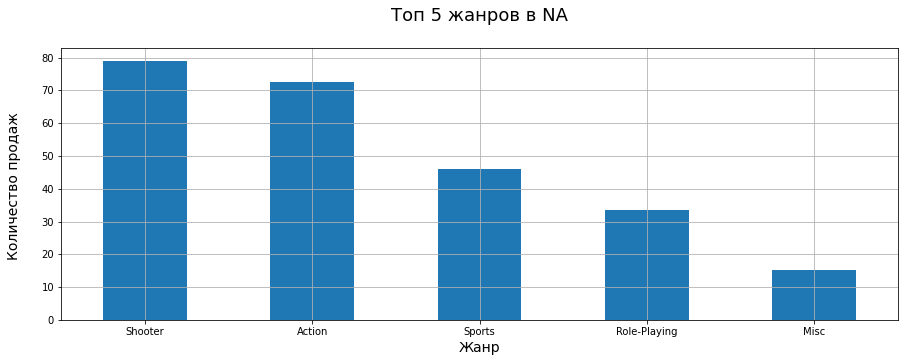

In [56]:
top_bar(top_na_genres, 'genre', 'na_sales', 'жанров', 'NA', 'Жанр')

In [57]:
esrb_na = top('rating', 'na_sales', actual_df.rating.nunique())
esrb_na

,rating,na_sales,share
0,M,96.42,0.34
1,unknown,64.72,0.23
2,E,50.74,0.18
3,T,38.95,0.14
4,E10+,33.23,0.12


##### Итого для для рынка Северной Америки: 

Самые популярные платформы:
1. PS4 (35% продаж)
2. XOne (29% продаж)
3. X360 (10% продаж)
4. PS3 (8% продаж)
5. 3DS (8% продаж)

Наибольшее число продаж приходит на Хbox 360 - более четверти рынка 27% 

Самые популярные жанры:

1. Shooter (28% продаж)
2. Action (26% продаж)
3. Sports (16% продаж)
4. Role-Playing (12% продаж)
5. Misc (5% продаж)

Скорее всего, рейтинг жанров выстраивается подобным образом, т.к. данные жанры игр более всего распространены на консолях.

Наибольшее число игр с рейтингом ESRB:
1. M (34% продаж)
2. unknown (23% продаж)
3. E (18% продаж)
4. T (14% продаж)
5. E10+ (12% продаж)

Наибольшей популярностью пользуются игры с рейтингом E и M, у 23% нет рейтинга ESRB - возможно, это японские игры?

In [58]:
top_eu_platforms = top('platform', 'eu_sales', 5)
top_eu_platforms

,platform,eu_sales,share
0,PS4,130.04,0.48
1,XOne,46.25,0.17
2,PS3,25.54,0.09
3,PC,17.97,0.07
4,3DS,16.12,0.06


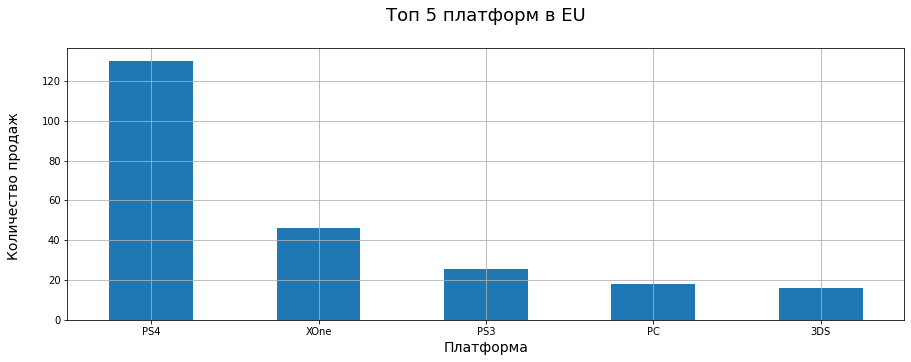

In [59]:
top_bar(top_eu_platforms, 'platform', 'eu_sales', 'платформ', 'EU', 'Платформа')

In [60]:
top_eu_genres = top('genre', 'eu_sales', 5)
top_eu_genres

,genre,eu_sales,share
0,Action,74.68,0.28
1,Shooter,65.52,0.24
2,Sports,45.73,0.17
3,Role-Playing,28.17,0.10
4,Racing,14.13,0.05


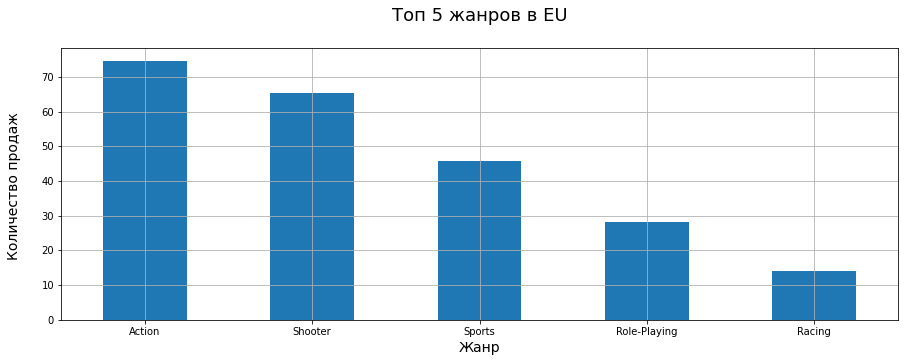

In [61]:
top_bar(top_eu_genres, 'genre', 'eu_sales', 'жанров', 'EU', 'Жанр')

In [62]:
esrb_eu = top('rating', 'eu_sales', actual_df.rating.nunique())
esrb_eu

,rating,eu_sales,share
0,M,93.44,0.35
1,unknown,58.95,0.22
2,E,58.06,0.21
3,T,34.07,0.13
4,E10+,26.16,0.10


##### Итого для европейского рынка:

Самые популярные платформы:
1. PS4 (48% продаж)
2. XOne (17% продаж)
3. PS3 (9% продаж)
4. PC (7% продаж)
5. 3DS (6% продаж)

Самые популярные жанры:
1. Action (28% продаж)
2. Shooter (24% продаж)
3. Sports (17% продаж)
4. Role-Playing (10% продаж)
5. Racing (5% продаж)

Наибольшее число игр с рейтингом ESRB:
1. M (35% продаж)
2. unknown (22% продаж)
3. E (21% продаж)
4. T (13% продаж)
5. E10+ (10% продаж)

В целом, европейский рынок похож на североамериканский, однако тут Xbox 360 был вытеснен PC и PS4 уже захватила почти половину рынка. В жанрах в топ вырвались гонки, в отличие от Misc в NA. С топ-5 рейтинга ESRB ситуация аналогичная рынку NA 

In [63]:
top_jp_platforms = top('platform', 'jp_sales', 5)
top_jp_platforms

,platform,jp_sales,share
0,3DS,44.24,0.48
1,PS4,15.02,0.16
2,PSV,14.54,0.16
3,PS3,11.22,0.12
4,WiiU,7.31,0.08


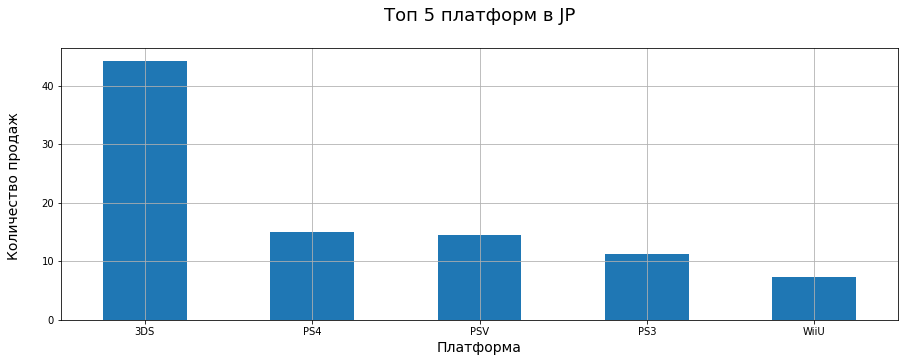

In [64]:
top_bar(top_jp_platforms, 'platform', 'jp_sales', 'платформ', 'JP', 'Платформа')

In [65]:
top_jp_genres = top('genre', 'jp_sales', 5)
top_jp_genres

,genre,jp_sales,share
0,Role-Playing,31.16,0.33
1,Action,29.58,0.32
2,Fighting,6.37,0.07
3,Misc,5.61,0.06
4,Shooter,4.87,0.05


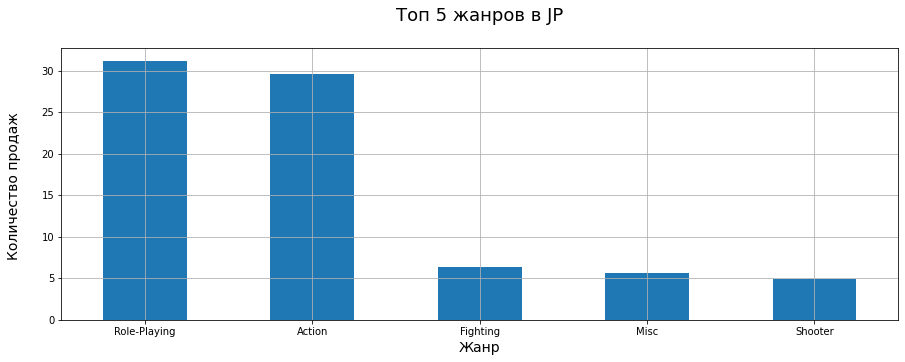

In [66]:
top_bar(top_jp_genres, 'genre', 'jp_sales', 'жанров', 'JP', 'Жанр')

In [67]:
esrb_jp = top('rating', 'jp_sales', actual_df.rating.nunique())
esrb_jp

,rating,jp_sales,share
0,unknown,56.90,0.61
1,T,14.78,0.16
2,E,8.94,0.10
3,M,8.01,0.09
4,E10+,4.46,0.05


##### Итого по японскому рынку:

Самые популярные платформы:

1. 3DS (48% продаж)
2. PS4 (16% продаж)
3. PSV (16% продаж)
4. PS3 (12% продаж)
5. WiiU (8% продаж)

Самые популярные жанры:

1. Role-Playing	(33% продаж)
2. Action (32% продаж)
3. Fighting (7% продаж)
4. Misc (6% продаж)
5. Shooter (5% продаж)

Наибольшее число игр с рейтингом ESRB:

1. unknown (61% продаж)
2. T (16% продаж)
3. E (10% продаж)
4. M (9% продаж)
5. E10+ (5% продаж)

А вот японский рынок игр сильно отличается от европейского и североамериканского. 
1. наиболее популярны здесь карманная платформы от Nintendo и Sony. 
2. наиболее популярный жанр - RPG, в топ-5 вышел жанр Fighting.
3. похоже игры на японском рынке редко проходят процедуру присвоения рейтинга ESRB.

#### Проверка гипотез

##### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Необходимо сравнить две независимые выборки, для этого используем t-тест для независимых выборок.

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза - средние пользовательские рейтинги разные.

Для начала сделаем соответствующие срезы и посмотрим насколько различаются дисперсии, чтобы выбрать значение аргумента `equal_var` и провести тест более точно.

In [68]:
x_one = actual_df[(actual_df.platform == 'XOne') & (actual_df.user_score != -1)].user_score
pc = actual_df[(actual_df.platform == 'PC') & (actual_df.user_score != -1)].user_score

print(f'Дисперсия пользовательского рейтнига для Xbox One {np.var(x_one)}')
print(f'Дисперсия пользовательского рейтнига для PC {np.var(pc)}')

Дисперсия пользовательского рейтнига для Xbox One 1.8795460055096425
Дисперсия пользовательского рейтнига для PC 2.8773743617307175


Дисперсия различается значительно, поэтому ставим equal_var=False

Уровень статистической значимости выбираем 0.01, т.к. имеем не самые надежные данные, поэтому постараемся скомпенсировать их недостатки строгостью теста

In [69]:
alpha = 0.01

result = st.ttest_ind(x_one, pc, equal_var=False)

print(result.pvalue)

if result.pvalue < alpha: 
     print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не получилось, а значит, из имеющихся данных мы не можем сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC значительно различаются

##### Гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Необходимо сравнить две независимые выборки, для этого используем t-тест для независимых выборок.

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые;

Альтернативная гипотеза - средние пользовательские рейтинги разные.

Для начала сделаем соответствующие срезы и посмотрим насколько различаются дисперсии, чтобы выбрать значение аргумента `equal_var` и провести тест более точно.

In [70]:
action = actual_df[(actual_df.genre == 'Action') & (actual_df.user_score != -1)].user_score
sports = actual_df[(actual_df.genre == 'Sports') & (actual_df.user_score != -1)].user_score 

print(f'Дисперсия пользовательского рейтнига для жанра "Action" {np.var(action)}')
print(f'Дисперсия пользовательского рейтнига для жанра "Sports" {np.var(sports)}')

Дисперсия пользовательского рейтнига для жанра "Action" 1.89208448117539
Дисперсия пользовательского рейтнига для жанра "Sports" 3.4198375596751185


Дисперсия различается значительно, поэтому ставим equal_var=False

В данном случае, нам важно проверить неравенство средних, то необходимо указать в качестве аргумента alternative='two-sided', однако это является аргументом по умолчанию.

Уровень статистической значимости выбираем 0.01, т.к. имеем не самые надежные данные, поэтому постараемся скомпенсировав их недостатки строгостью теста

In [71]:
alpha = 0.01

result = st.ttest_ind(action, sports, equal_var=False)

print(result.pvalue)

if result.pvalue < alpha: 
     print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

1.1825550382644557e-14
Отвергаем нулевую гипотезу


В данном случе нулевую гипотезу можно отвергнуть, а значит, из имеющихся данных можно сделать вывод, что средние пользовательские рейтниги жанров Action и Sports имеют значимую разницу. 

#### Общий вывод.

__1. Данные__.

- имеются пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_score`, `Rating` 
- у столбцов `Year_of_Release`, `User_Score` тип данных не соответствует значениям
- названия столбцов с заглавных букв
- пропуски в столбцах `Name`, `Year_of_Release`, `Genre` скорее всего связаны с ошибкой ввода данных 
- пропуски в столбцах `Critic_Score`, `User_score`, `Rating` могут быть вызваны несколькими причинами: непопулярность игры, отсутствие обратной связи от пользователей, неактуально рейтинга ESRB в регионе продажи игры
- имеется несколько неполных дубликатов в столбцах `Name` и `Platform` связанных с одинаковым названием игр, но разным годом выпуска. Также есть несколько неполных дубликатов, вероятно связанных с разной датой старта продаж в различных регионах.
- в столбце `Year_of_Release` была аномалия: у игры Strongest Tokyo University Shogi для DS стоит год выпуска 1985, в то время как Nintendo DS начал производится только в 2004 года. Игра была перевыпущена в 2007.

__2. Выводы по результатам исследований__

- начиная с 1993 по 2009 год видим постоянный рост количества выпускаемых игр. В 2009 количество выпускаемых игр для имеющихся на рынке платформ начало снижаться. Вероятно, в это время начал активно развиваться рынок смартфонов и часть продаж ушла туда. 
- данных до 1993 год незначительное количество и их можно не учитывать в дальнейших исследованиях.
- топ 7 платформ по количеству продаж:
    1. PS2
    2. X360
    3. Wii
    4. PS3
    5. DS
    6. PS
    7. GBA
- средняя продолжительность жизни платформы - 8 лет
- актуальный период для исследования данных начинается с 2014 года, т.к в исследовании более важно увидеть будущих лидеров рынка. 
- потенциально прибыльные платформы на актуальный период - Хbox One и PS4
- на диаграмме размаха встречается очень много выбросов - очевидно, что некоторые игры имеют большее число продаж, чем все остальные, следовательно, чем больше выбросов, тем больше популярных игр и более популярна платформа. 
- оценки пользователей и критиков слабо связаны с количеством продаж.
- связь оценки критиков с количеством продаж немного больше чем связь оценки пользователей
- жанр Action имеет больше всего продаж, но и число выпускаемых игр в этом жанре тоже больше 
- лучше всего продаются игры жанров Shooter и Sports
- хуже всего продаются игры жанра Adventure и Strategy
- североамериканский и европейский игроки довольно схожи:
    1. в топе-5 платформ совпадают 4, разница: Xbox 360 был вытеснен PC и PS4 уже захватила почти половину рынка
    2. в топ-5 жанров совпадает 4, разница: жанр Racing и Misc
    3. наиболее популярны игры с рейтингом M, на втором месте игры не получившие оценку ESRB
- японский игрок сильно отличается от европейского и североамериканского:  
    1. наиболее популярны здесь карманные платформы от Nintendo и Sony. 
    2. наиболее популярный жанр RPG, в топ-5 есть жанр Fighting, которого нет в NA и EU
    3. похоже игры на японском рынке редко проходят процедуру присвоения рейтинга ESRB.
- средние пользовательские рейтинги платформ Xbox One и PC не имеют значимой разницы в представленных данных
- средние пользовательские рейтинги жанров Action и Sports имеют значимую разницу в представленных данных

__Итог__. Для того, чтобы игра была успешной в обозримом будущем необходимо:

    1. Принадлежала к платформам Xbox One, PS4. Для Японии - 3DS
    2. Принадлежала к жанру Action, Shooter (для рынков EU и NA) и Role-Playing (для рынка JP)
    4. Должна иметь рейтинг ESRB М


__3. Рекомендации__

 - возможно стоит обратить внимание на рынок мобильных игр, т.к. с 2009 года наблюдается снижение количества выпускаемых игр, а смартфоны становятся всё мощнее? 
 - возможно, стоит продумать способы получения обратной связи от игроков по проданным играм
 - может быть стоит добавить в наборы данных оценку СERO для лучшей оценки влияния возрастного рейтинга на продажи игр 